### 1. For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import acquire as a 
import prepare as p

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = a.acquire_store()
df

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
...,...,...,...,...,...,...,...
912995,2017-12-27,63,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231
912996,2017-12-28,59,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231
912997,2017-12-29,74,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231
912998,2017-12-30,62,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231


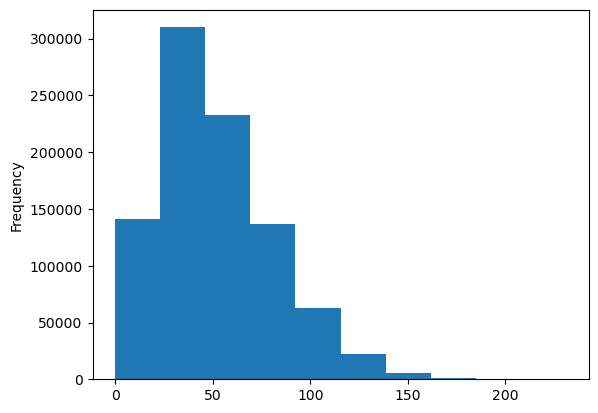

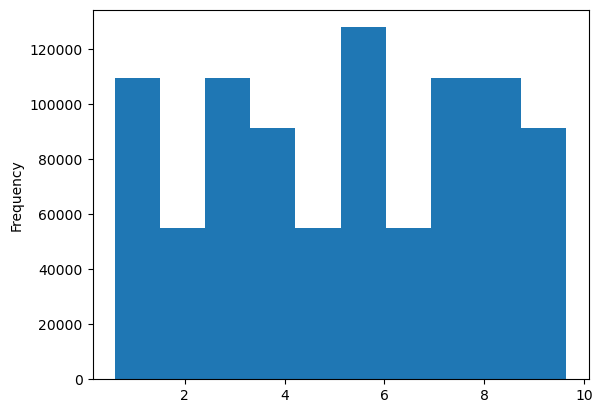

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,sales_total
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,8.40
...,...,...,...,...,...,...,...,...
2017-12-27,63,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,December,327.60
2017-12-28,59,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,December,306.80
2017-12-29,74,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,December,384.80


In [3]:
df = p.store_prepared()
df

In [4]:
df.dtypes

sale_amount        int64
item_brand        object
item_name         object
item_price       float64
store_address     object
store_zipcode      int64
month             object
sales_total      float64
dtype: object

In [5]:
df.index.dtype

dtype('<M8[ns]')

In [6]:
df.sort_index(inplace = True)

## Split data

In [8]:
df.shape

(913000, 8)

In [9]:
train_len = int(0.6 *len(df))
val_test_split = int(0.8 *len(df))
train_len, val_test_split

(547800, 730400)

In [10]:
train = df.iloc[:train_len]
val = df.iloc[train_len:val_test_split]
test = df.iloc[val_test_split:]
train.shape, val.shape, test.shape

((547800, 8), (182600, 8), (182600, 8))

In [11]:
train.shape[0]/913000

0.6

In [12]:
val.shape[0]/913000, test.shape[0]/913000

(0.2, 0.2)

In [13]:
train.columns.tolist()

['sale_amount',
 'item_brand',
 'item_name',
 'item_price',
 'store_address',
 'store_zipcode',
 'month',
 'sales_total']

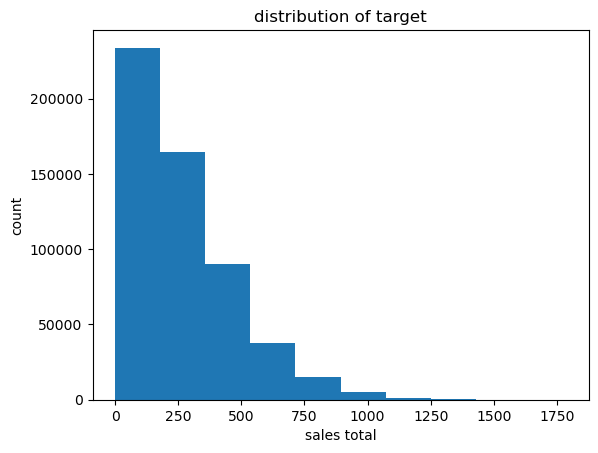

In [20]:
plt.hist(train['sales_total'])
plt.xlabel('sales total')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

<AxesSubplot:xlabel='item_brand'>

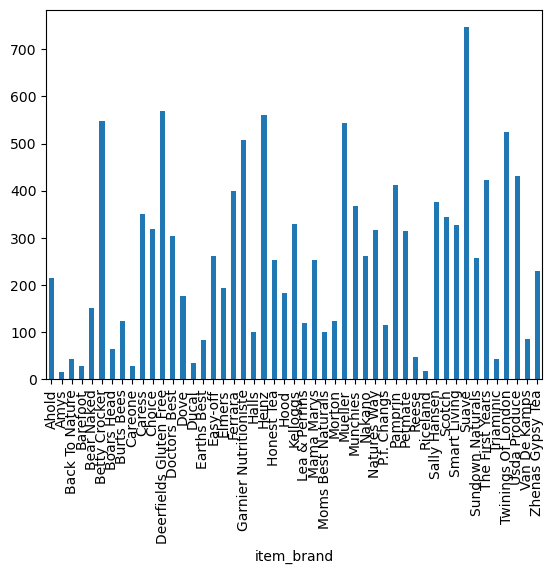

In [29]:
train.groupby('item_brand')['sales_total'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

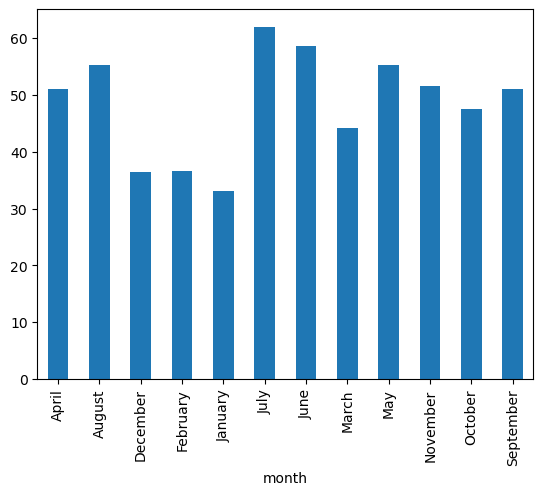

In [30]:
train.groupby('month')['sale_amount'].mean().plot.bar()

<AxesSubplot:xlabel='item_name'>

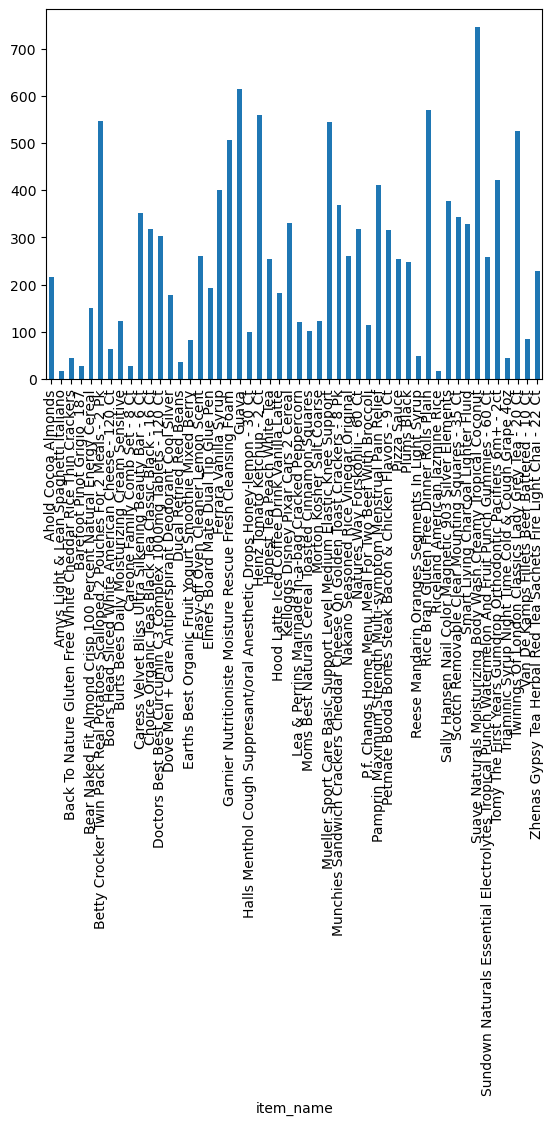

In [35]:
train.groupby('item_name')['sales_total'].mean().plot.bar()

<AxesSubplot:xlabel='sale_date'>

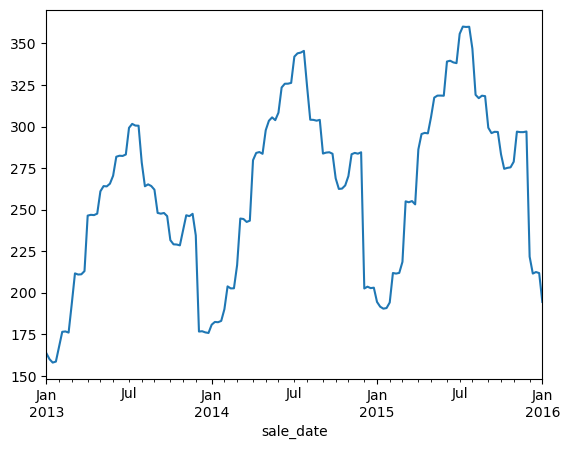

In [43]:
train.resample('W')['sales_total'].mean().plot()

<AxesSubplot:xlabel='sale_date'>

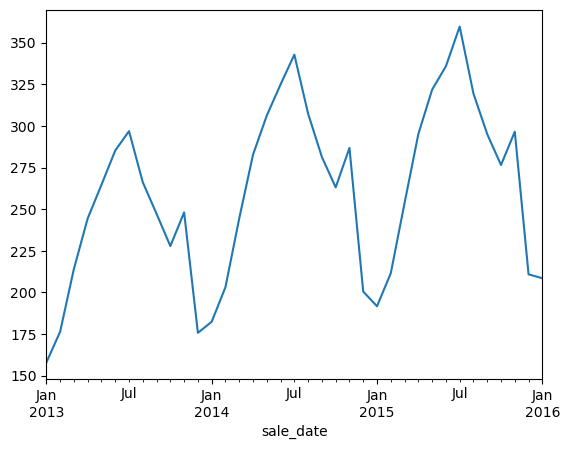

In [44]:
train.resample('M')['sales_total'].mean().plot()

In [53]:
y = train.sales_total

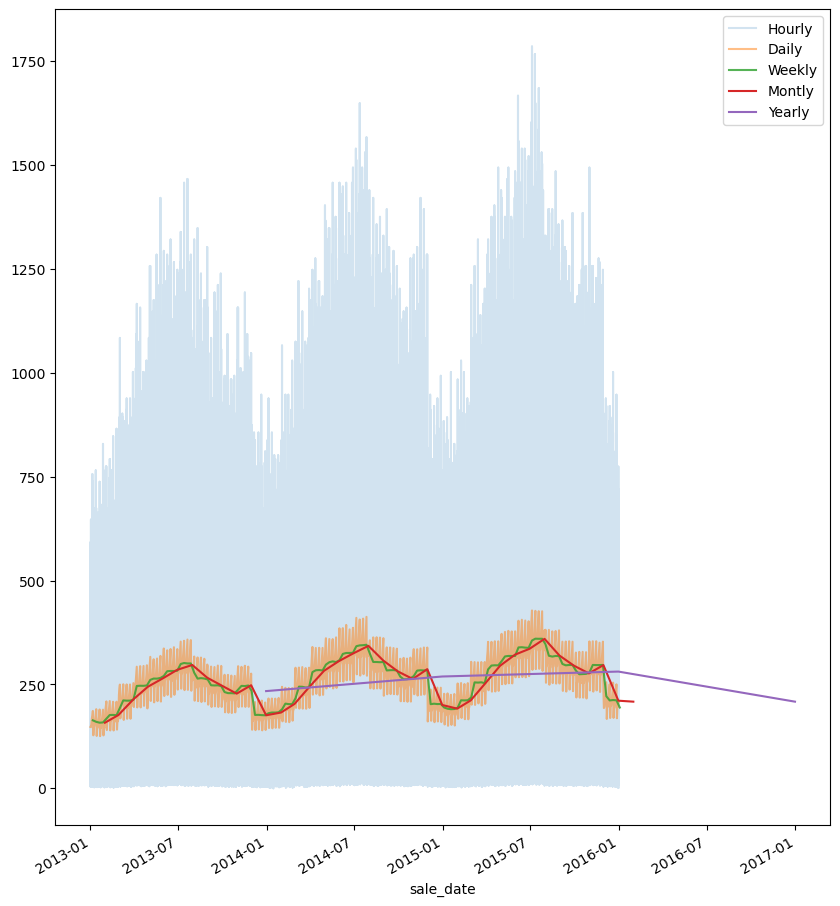

In [74]:
plt.figure(figsize=(10,12))
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

In [80]:
germany = a.get_renewable_energy_data()
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [81]:
germany = p.clean_germany_df()
germany.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


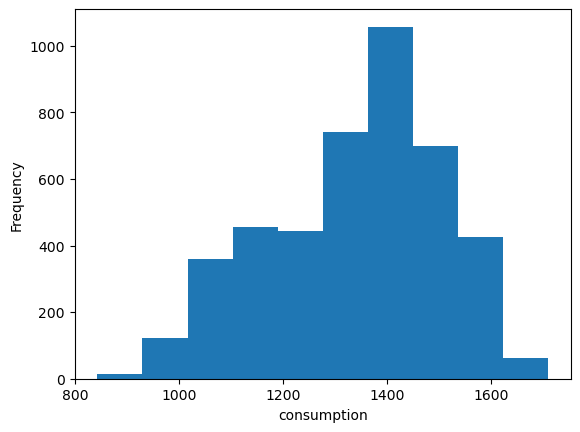

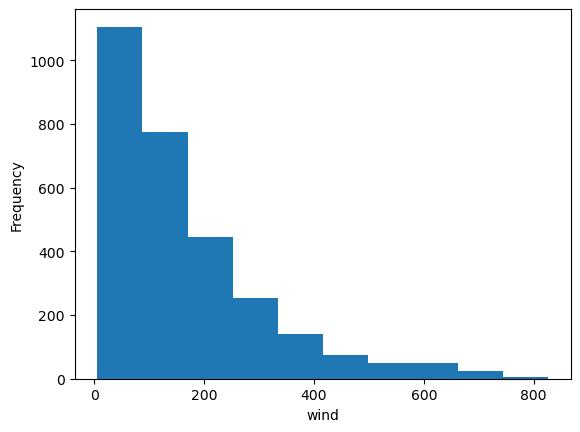

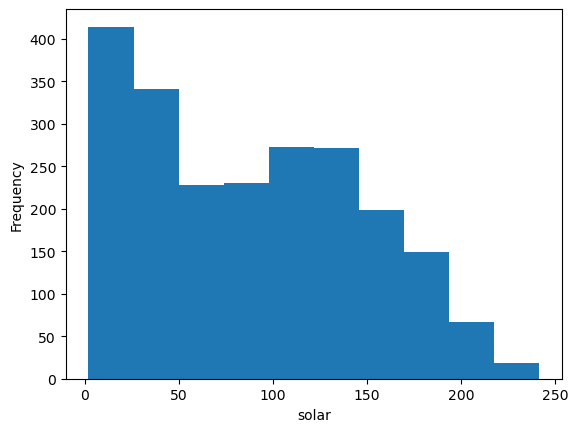

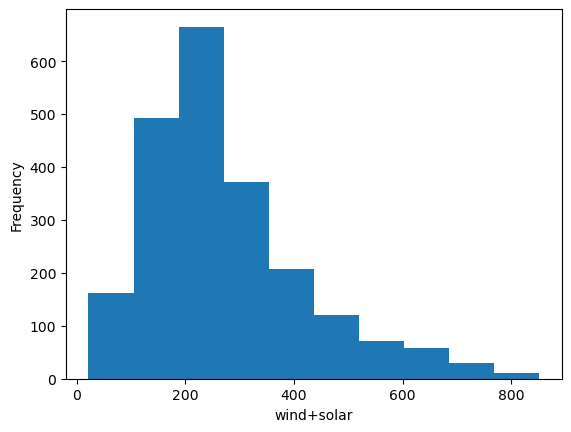

In [83]:
dist_germany = p.dist_of_col()
dist_germany

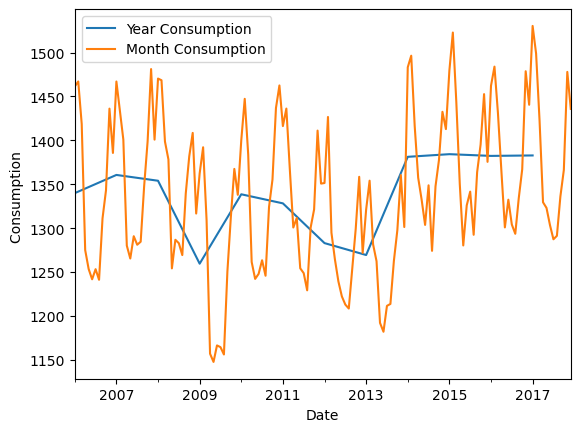

In [98]:
germany['consumption'].resample('Y').mean().plot.line()
germany['consumption'].resample('M').mean().plot.line()
plt.xlabel('Date')
plt.ylabel('Consumption ')
plt.legend(['Year Consumption', 'Month Consumption'])
plt.show()

In [110]:
train_len = int(0.6 *len(germany))
val_test_split = int(0.8 *len(germany))
train_len, val_test_split

(2629, 3506)

In [111]:
train = germany.iloc[:train_len]
val = germany.iloc[train_len:val_test_split]
test = germany.iloc[val_test_split:]
train.shape, val.shape, test.shape

((2629, 6), (877, 6), (877, 6))

<AxesSubplot:xlabel='month'>

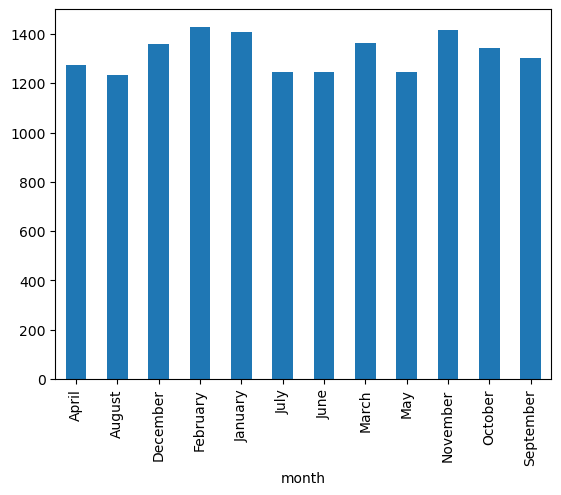

In [116]:
train.groupby('month')['consumption'].mean().plot.bar()

<AxesSubplot:xlabel='date'>

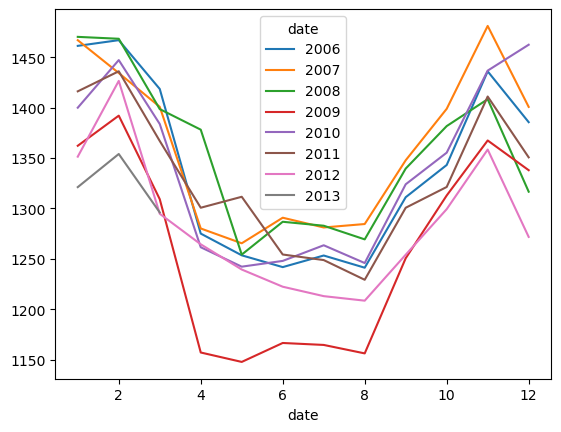

In [120]:
train['consumption'].groupby([train.index.year,train.index.month]).mean().unstack(0).plot()

In [125]:
week_mean = train['consumption'].resample('W').mean()
week_mean = pd.DataFrame(week_mean)

In [126]:
week_mean['shifted'] = week_mean['consumption'].shift(-1)
week_mean

,consumption,shifted
date,,
2006-01-01,1069.184000,1381.300143
2006-01-08,1381.300143,1486.730286
2006-01-15,1486.730286,1490.031143
2006-01-22,1490.031143,1514.176857
2006-01-29,1514.176857,1501.403286
...,...,...
2013-02-17,1367.142143,1348.114857
2013-02-24,1348.114857,1333.157143
2013-03-03,1333.157143,1288.966000


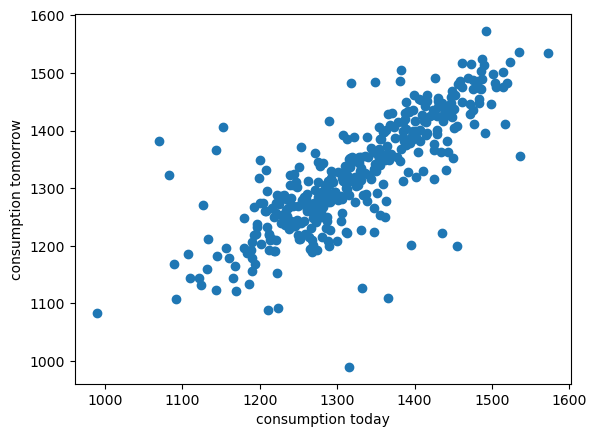

In [128]:
plt.scatter(week_mean['consumption'], week_mean['shifted'])
plt.xlabel('consumption today')
plt.ylabel('consumption tomorrow')
plt.show()